# KMeans
- K개의 그룹(중심점을 기준)으로 데이터 포인트를 나눔

https://scikit-learn.org/stable/modules/clustering.html

![](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif?20170530143526)


**작동 단계**
1. K개의 중심점 임의 선택
2. 각 데이터 포인트를 가장 가까운 중심점에 할당 > 군집 형성
3. 각 군집의 데이터 포인트 기반으로 새로운 중심점 계산
4. 2~3 단계를 중심점의 변화가 거의 없을 때까지 반복 실행

**장단점**
- 장점
 - 간단한 개념과 구현
 - 빠른 계산 속도
 - 일반적인 군집화에서 가장 많이 활용되며 대용량 데이터에도 활용 가능
- 단점
 - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도 떨어짐
 - 반복적으로 수행하므로 반복 횟수가 많아지면 수행 시간 느려짐
 - 이상치(outlier) 데이터에 취약
 - 군집이 원형 구조가 아닐 경우 성능 저하 가능성

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target # 0: setosa, 1: versicolor, 2: virginica
# iris_df

# iris.target_names

In [25]:
# KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,       # 클러스터 개수 (= 중심점 개수 / 기본값: 8)
    init='k-means++',   # 초기 중심점 설정 방식
    max_iter=300,       # 최대 반복 횟수
    random_state=0
)

kmeans.fit(iris.data)   # 중심점 찾기
distances = kmeans.transform(iris.data) # 중심점과의 거리 계산 및 반환
distances

array([[3.41251117, 0.14135063, 5.03132789],
       [3.38963991, 0.44763825, 5.08750645],
       [3.56011415, 0.4171091 , 5.25229169],
       [3.412319  , 0.52533799, 5.12704282],
       [3.4603117 , 0.18862662, 5.07638109],
       [3.14251434, 0.67703767, 4.6529179 ],
       [3.50715704, 0.4151867 , 5.18485505],
       [3.32903073, 0.06618157, 4.97466956],
       [3.56110404, 0.80745278, 5.3020706 ],
       [3.34972272, 0.37627118, 5.04034023],
       [3.31978466, 0.4824728 , 4.86909709],
       [3.30275389, 0.25373214, 4.96948678],
       [3.45734945, 0.50077939, 5.1637448 ],
       [3.89486669, 0.91322505, 5.62559662],
       [3.64453145, 1.01409073, 5.07819914],
       [3.49280098, 1.20481534, 4.85660046],
       [3.49087612, 0.6542018 , 5.00219478],
       [3.37762449, 0.1441527 , 4.99534695],
       [3.10971292, 0.82436642, 4.58840834],
       [3.37135761, 0.38933276, 4.94411371],
       [3.06922637, 0.46344363, 4.66670189],
       [3.30868004, 0.3286031 , 4.89580185],
       [3.

In [26]:
# 군집화 결과
iris_df['cluster'] = kmeans.labels_
iris_df.groupby('species')['cluster'].value_counts()
# 0: setosa, 1: versicolor, 2: virginica

species  cluster
0        1          50
1        0          47
         2           3
2        2          36
         0          14
Name: count, dtype: int64

In [27]:
# 시각화를 위해 PCA 2개의 주성분으로 변환
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
iris_df['pca1'] = pca_transformed[:, 0]
iris_df['pca2'] = pca_transformed[:, 1]

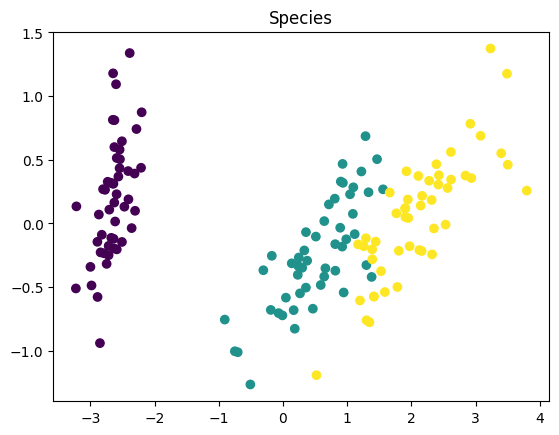

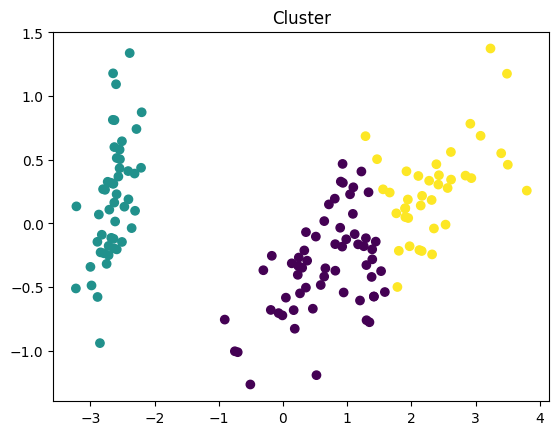

In [28]:
# species(라벨 데이터) 기준 시각화
plt.scatter(x=iris_df['pca1'], y=iris_df['pca2'], c=iris_df['species'])
plt.title('Species')
plt.show()

# cluster(kmeans 군집 데이터) 기준 시각화
plt.scatter(x=iris_df['pca1'], y=iris_df['pca2'], c=iris_df['cluster'])
plt.title('Cluster')
plt.show()


In [29]:
fruits = np.load('./data/fruits_300.npy')
fruits.shape

(300, 100, 100)

In [30]:
# 이미지 시각화 함수
def draw_fruits(arr, ratio=1):
    N = len(arr)
    rows = int(np.ceil(N / 10))
    cols = N if rows < 2 else 10
    fig, ax = plt.subplots(
        rows, cols, 
        figsize=(cols * ratio, rows * ratio),
        squeeze=False
        )
    
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < N:
                ax[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            ax[i, j].axis('off')

    plt.show()

In [31]:
# KMeans 군집 적용을 위한 reshape
fruits_ld = fruits.reshape(-1, 100*100)
# KMeans 적용
kmeans = KMeans(n_clusters=3, random_state =42)
kmeans.fit(fruits_ld)



KMeans(n_clusters=3, random_state=42)

In [32]:
# kmeans.labels_ 군집 결과 확인
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))

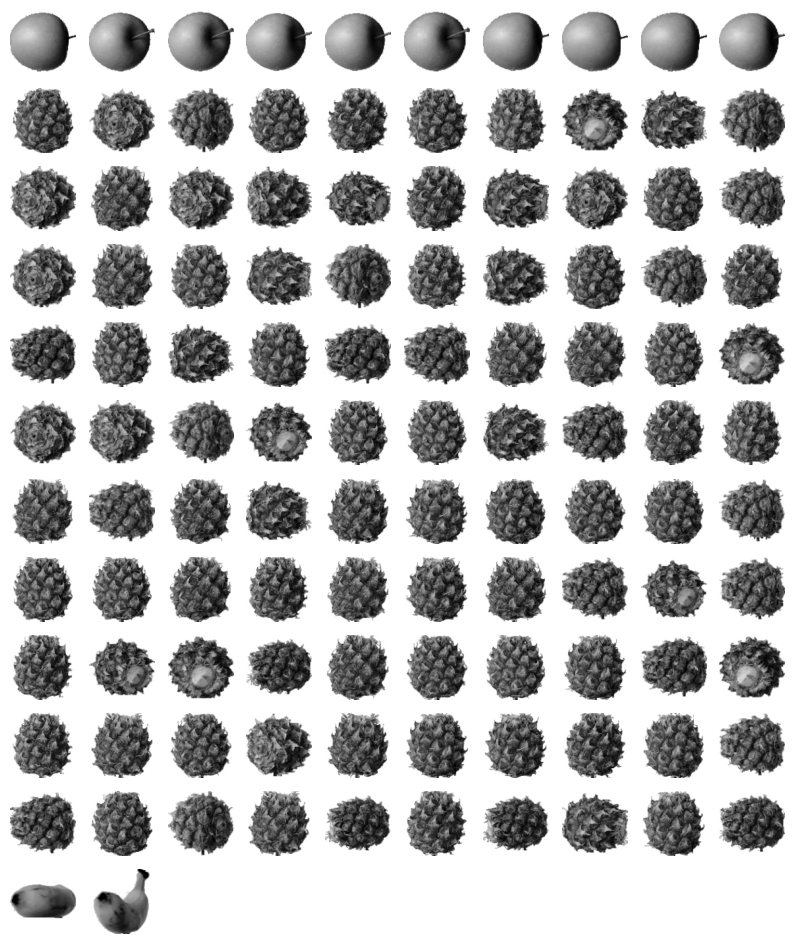

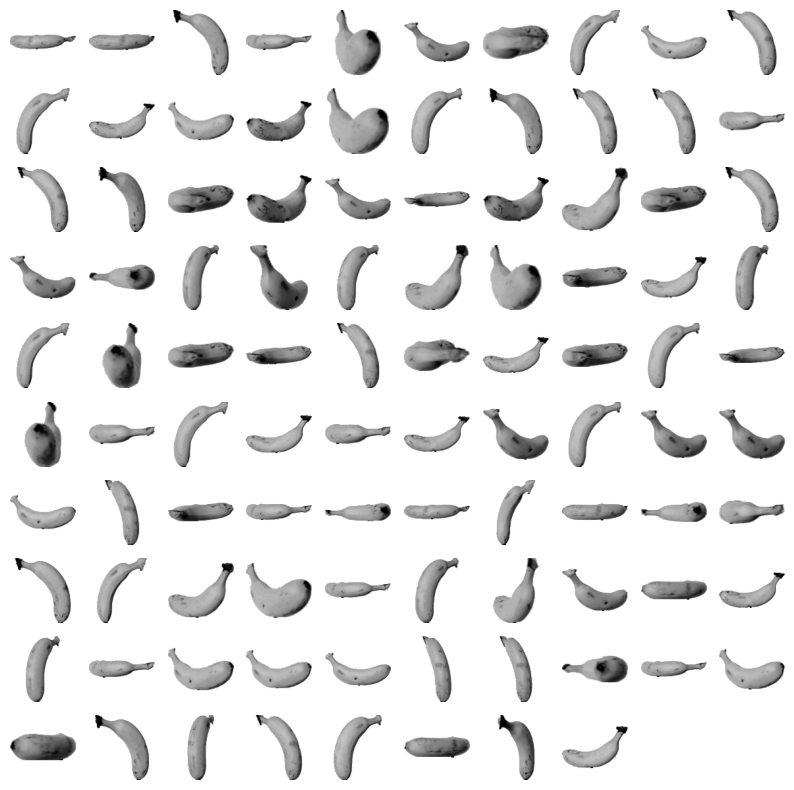

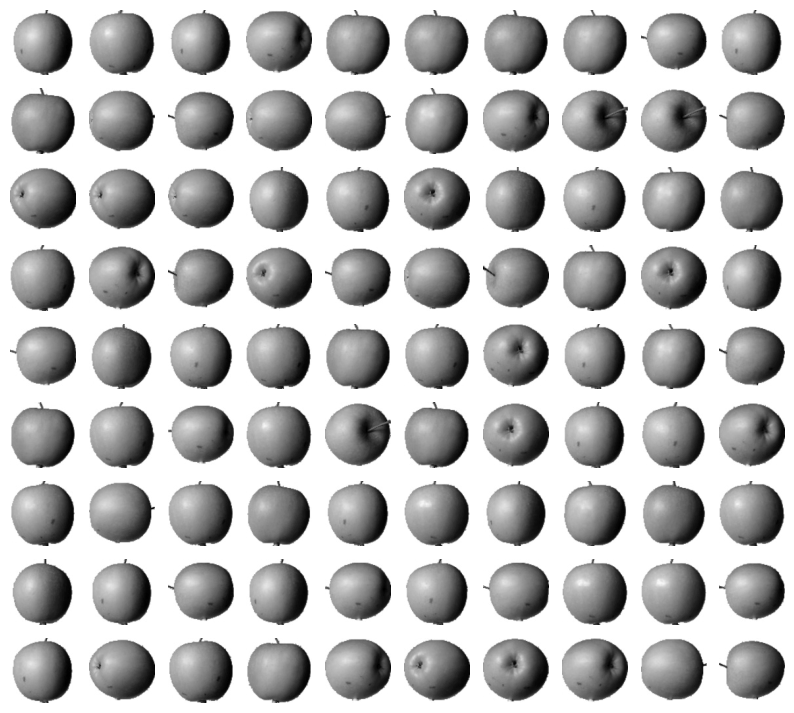

In [33]:
# 각 클러스터별 이미지 시각화
draw_fruits(fruits[kmeans.labels_==0])
draw_fruits(fruits[kmeans.labels_==1])
draw_fruits(fruits[kmeans.labels_==2])

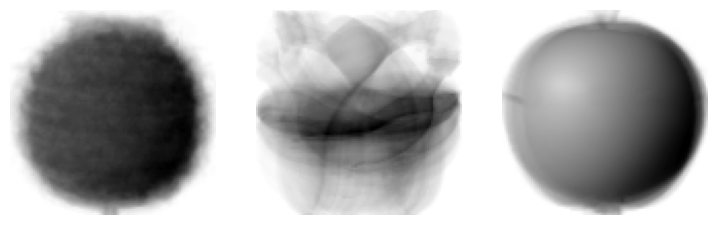

In [34]:
# 중심점 시각화
draw_fruits(kmeans.cluster_centers_.reshape(-1,100,100),ratio=3)

In [35]:
#PCA 적용 후 클러스터링
pca = PCA(n_components=3,random_state=42)
fruits_pca = pca.fit_transform(fruits_ld)
fruits_pca.shape


(300, 3)

In [36]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(fruits_pca)
kmeans_pca.labels_



array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [37]:
np.unique(kmeans_pca.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

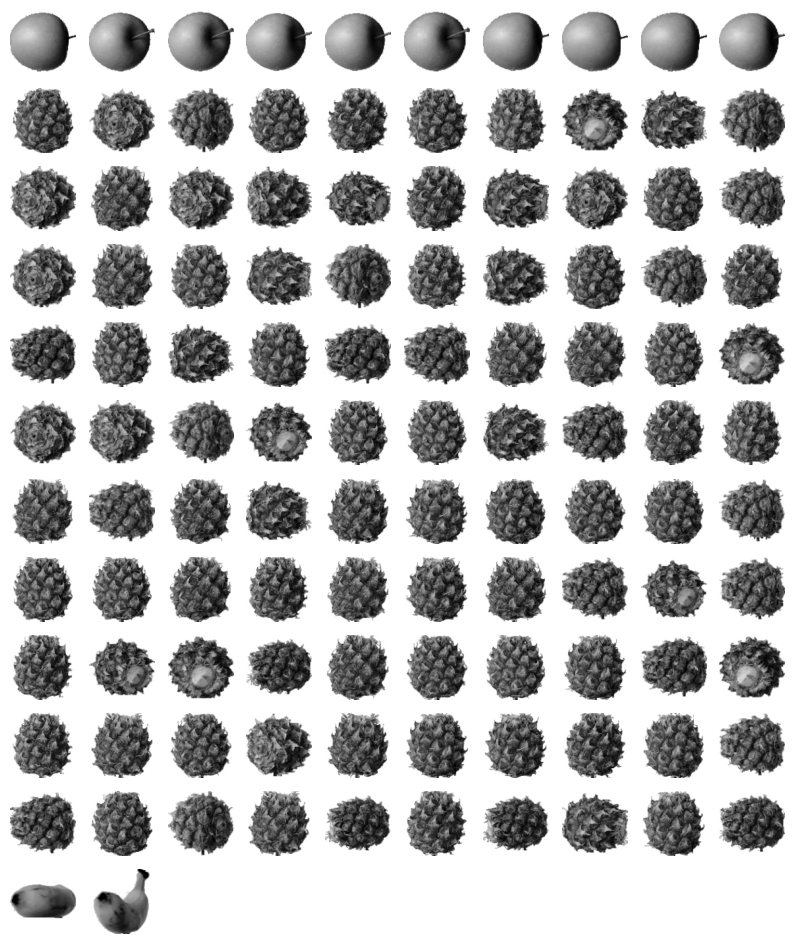

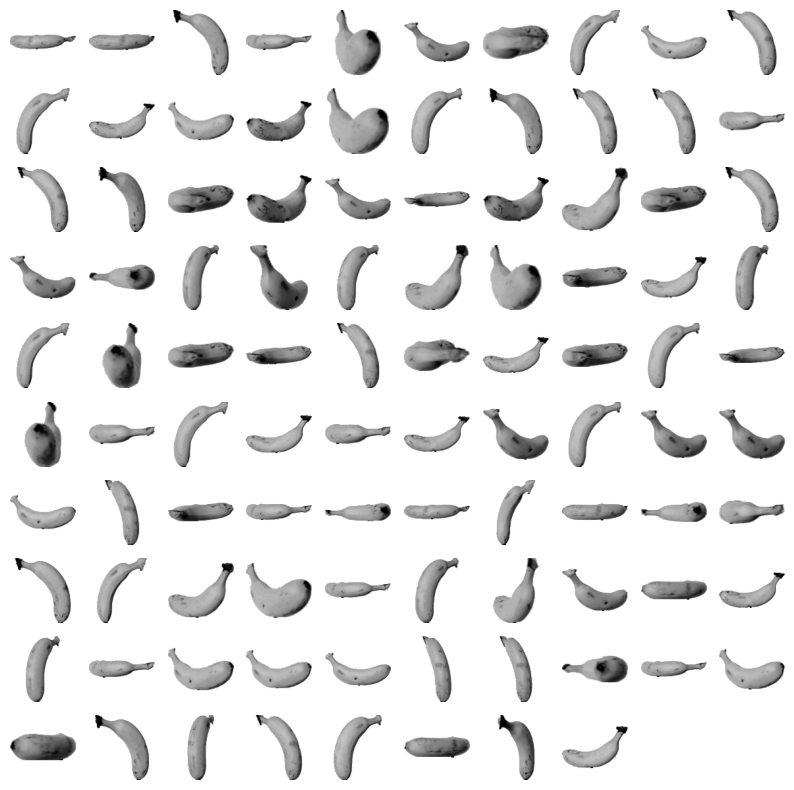

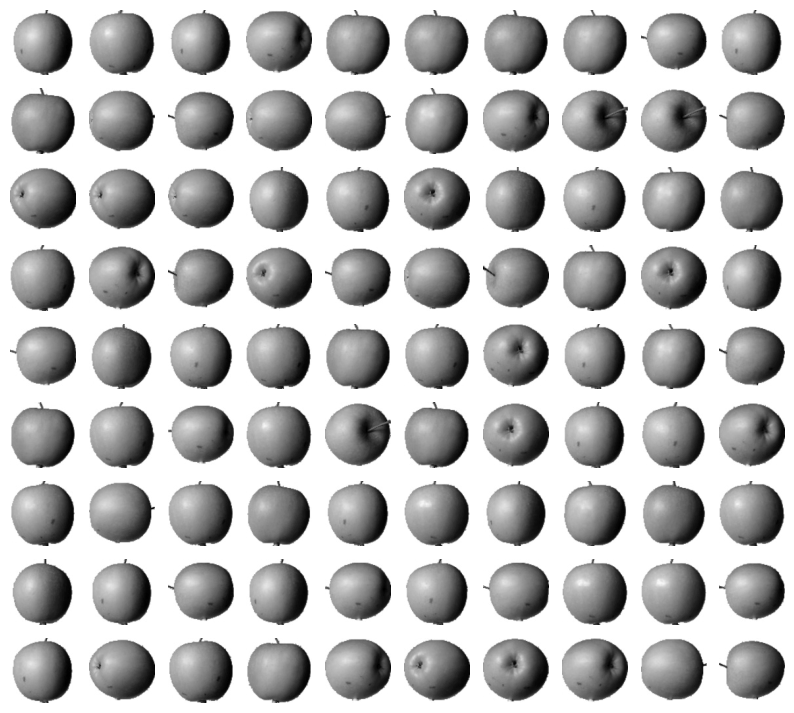

In [38]:
# 각 클러스터별 이미지 시각화
draw_fruits(fruits[kmeans.labels_==0])
draw_fruits(fruits[kmeans.labels_==1])
draw_fruits(fruits[kmeans.labels_==2])

In [39]:
pred = kmeans_pca.predict(fruits_pca[100:101])
print(pred)

[0]


### 최적의 k 값 찾기
- inertia : 중심점으로부터 각 데이터포인트의 분산값
     - 이너셔 값이 작을수록 군집이 잘 되어 있다고 볼 수 있음.
- Elbow 기법 : inertia값이 급격히 감소하는 k값을 최적의 k 값으로 판단.

In [40]:
inertias = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fruits_pca)
    inertias.append(kmeans.inertia_)
inertias

[1849315491.3736587,
 1097091517.2521203,
 763735518.5881655,
 669240539.9443893,
 519641487.819855,
 427900081.160879,
 350640883.6995818,
 313214823.7789828,
 263576587.96586818]

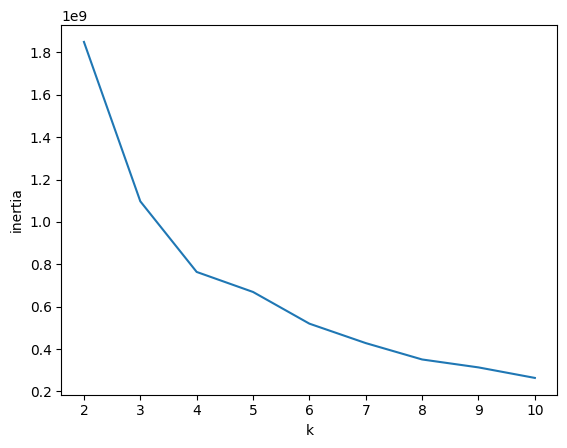

In [42]:
plt.plot(range(2,11), inertias)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
